In [1]:
using QuantumStates

The Hamiltonian is assumed to take the following form:
$$
H(A^2\Pi) = T + A \Lambda \Sigma + BN^2 - DN^4 + \frac{1}{2} (p + 2q)(e^{2i\phi} S_- J_- + e^{-2i\phi} S_+ J_+) - \frac{1}{2} q (e^{2i\phi} J_-^2 + e^{-2i\phi} J_+^2).
$$
These terms correspond to the origin, spin-orbit, rotation and centrifugal distortion correction, and $\Lambda$-doubling terms.

In [2]:
H_operator = :(
    T_A * DiagonalOperator +
    Be_A * Rotation + 
    Aso_A * SpinOrbit + 
    q_A * (ΛDoubling_q + 2ΛDoubling_p2q) +
    p_A * ΛDoubling_p2q + 
    # B_z * Zeeman_L +
    # b00_A * Hyperfine_IL +
    # b00_A * Hyperfine_IF +
    b00_A * (Hyperfine_IF - Hyperfine_IL)
);

In [3]:
# Spectroscopic constants for the A²Π state in CaF (from Eunmi Chae's thesis, 2016)
parameters = @params begin
    T_A = 16526.750 * c * 1e2
    Be_A = 0.348781 * c * 1e2
    Aso_A = 71.429 * c * 1e2
    b00_A = 1e6
    p_A = -0.044517 * c * 1e2
    q_A = -2.916e-4 * c * 1e2
end;

In [4]:
QN_bounds = (label = "A", S = 1/2, I = 1/2, Λ = (-1,1), J = 1/2:11/2)
basis = order_basis_by_m(enumerate_states(HundsCaseA_LinearMolecule, QN_bounds))
;

In [5]:
CaF_A_v0 = @time Hamiltonian(basis=basis, operator=H_operator, parameters=parameters)
@time full_evaluate!(CaF_A_v0)
@time solve!(CaF_A_v0)
;

  2.836436 seconds (12.98 M allocations: 547.424 MiB, 19.36% gc time, 61.60% compilation time)
  1.195745 seconds (11.46 M allocations: 417.738 MiB, 9.82% gc time, 49.54% compilation time)
  0.278814 seconds (213.02 k allocations: 19.232 MiB, 2.65% gc time, 82.72% compilation time)


In [6]:
@time save_to_file(CaF_A_v0, "CaF_A_v0", "")

  0.202906 seconds (496.98 k allocations: 32.008 MiB, 90.07% compilation time)


In [7]:
using Plots

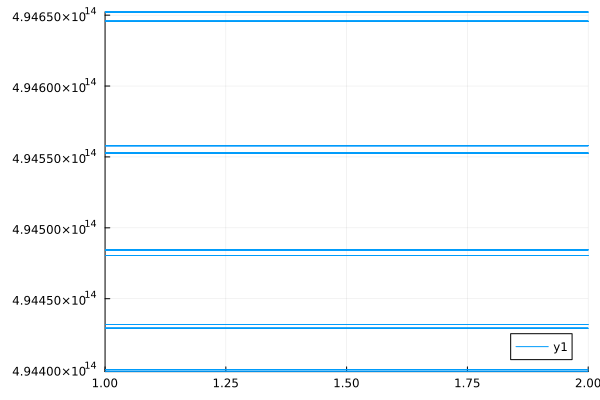

In [8]:
energy.(CaF_A_v0.states[1:120]) |> hline

In [9]:
CaF_A_v0.states[25]

State{HundsCaseA_LinearMolecule}(4.944804732922372e14, HundsCaseA_LinearMolecule[HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, -1, -1, 1/2, 1/2, -1/2, 11/2, -3/2, 6, -6, (K = -1, Σ = -0.5:1.0:0.5, P = -1.5:1.0:-1.5, F = 5.0:1.0:6.0, M = -6.0:1.0:6.0)), HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, -1, -1, 1/2, 1/2, 1/2, 11/2, -1/2, 6, -6, (K = -1, Σ = -0.5:1.0:0.5, P = -0.5:1.0:-0.5, F = 5.0:1.0:6.0, M = -6.0:1.0:6.0)), HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, 1, 1, 1/2, 1/2, -1/2, 11/2, 1/2, 6, -6, (K = 1, Σ = -0.5:1.0:0.5, P = 0.5:1.0:0.5, F = 5.0:1.0:6.0, M = -6.0:1.0:6.0)), HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, 1, 1, 1/2, 1/2, 1/2, 11/2, 3/2, 6, -6, (K = 1, Σ = -0.5:1.0:0.5, P = 1.5:1.0:1.5, F = 5.0:1.0:6.0, M = -6.0:1.0:6.0)), HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, -1, -1, 1/2, 1/2, -1/2, 9/2, -3/2, 5, -5, (K = -1, Σ = -0.5:1.0:0.5, P = -1.5:1.0:-1.5, F = 4.0:1.0:5.0, M = -5.0:1.0:5.0)), HundsCaseA_LinearMolecule(0.0, "A", 0, 0, 0, 0, -1, -1, 1/2, 1/2